In [2]:
from csvreader import read_patient_csv
from PyTCI.weights import leanbodymass
from matplotlib import pyplot
from patient_solver import solve_for_marsh, solve_for_schnider
import math
import statistics
import numpy

In [3]:
patients = read_patient_csv()

obese_patients = []
for patient in patients:
    patient["bmi"] = leanbodymass.bmi(patient["height"], patient["weight"])
    if patient["bmi"] >=35:
        obese_patients.append(patient)

In [7]:
for patient in patients:
    if patient["age"] < 18:
        print(patient["id"], patient["age"])

254 3.0
255 5.0
256 3.0
257 4.0
258 5.0
259 3.0
260 5.0
261 7.0
262 6.0
263 6.0
264 8.0
265 7.0
266 7.0
267 7.0
268 10.0
269 10.0
270 9.0
271 10.0
272 11.0
273 11.0
274 10.0
275 4.0
276 5.0
277 4.0
278 3.0
279 4.0
280 5.0
281 5.0
282 4.0
283 4.0
284 3.0
285 4.0
286 7.0
287 7.0
288 7.0
289 6.0
290 8.0
291 8.0
292 8.0
293 8.0
294 8.0
295 6.0
296 7.0
297 10.0
298 9.0
299 9.0
300 9.0
301 9.0
302 10.0
303 10.0
304 11.0
305 10.0
306 11.0
403 5.0
404 5.0
405 3.0
406 3.0
407 5.0
408 5.0
409 4.0
410 6.0
411 6.0
412 6.0
413 5.0
414 6.0
415 6.0
416 5.0
417 8.0
418 7.0
419 8.0
420 7.0
421 7.0
422 7.0
423 8.0
424 11.0
425 10.0
426 9.0
427 9.0
428 10.0
429 11.0
430 10.0
431 7.8
432 5.0
433 5.0
434 7.0
435 10.0
436 4.0
437 4.25
438 6.0
439 7.0
440 5.0
441 3.0
442 2.0
443 2.0
444 2.0
445 4.0
446 1.75
447 7.0
448 3.25
449 7.0
450 5.0
451 4.0
452 3.0
453 3.0
454 4.0
455 7.4
456 4.5
457 8.0
458 9.33
459 4.66
460 2.6
461 3.25
462 5.0
463 5.2
464 3.0
465 14.0
466 17.0
467 17.0
468 0.33
469 0.44
470 0.46
47

(array([6., 5., 4., 8., 1., 0., 1., 1., 1., 1.]),
 array([35.4 , 37.14, 38.88, 40.62, 42.36, 44.1 , 45.84, 47.58, 49.32,
        51.06, 52.8 ]),
 <a list of 10 Patch objects>)

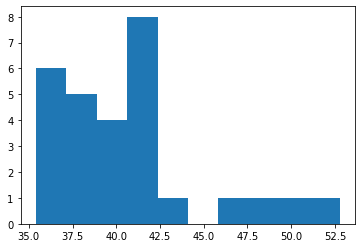

In [4]:
bmis = []
for person in obese_patients:
    bmis.append(person["bmi"])
    
pyplot.hist(bmis)

In [5]:
marsh_medians= []
marsh_bias = []
schnider_median = []
schnider_bias = []

mod_marsh_medians= []
mod_marsh_bias = []
mod_schnider_median = []
mod_schnider_bias = []

for patient in obese_patients:
    res = solve_for_marsh(patient, [])
    marsh_medians.append(res["median"])
    marsh_bias.append(res["bias"])
    
    res = solve_for_schnider(patient, [])
    schnider_median.append(res["median"])
    schnider_bias.append(res["bias"])
    
    if patient["sex"] == 'm':
        patient["weight"] = 1 * (patient["height"]-60)
    else:
        patient["weight"] = 1 * (patient["height"]-65)
    
    res = solve_for_marsh(patient, [])
    mod_marsh_medians.append(res["median"])
    mod_marsh_bias.append(res["bias"])
    
    res = solve_for_schnider(patient, [])
    mod_schnider_median.append(res["median"])
    mod_schnider_bias.append(res["bias"])
    

    

In [6]:
def returnmedian(a, b):
    marsh_medians= []
        
    for patient in obese_patients:

        if patient["sex"] == 'm':
            patient["weight"] = a * (patient["height"]-b)
        else:
            patient["weight"] = a * (patient["height"]-(b+5))

        res = solve_for_marsh(patient, [])
        marsh_medians.append(res["median"])
        
    return round(statistics.mean(marsh_medians), 2)

In [7]:
base = [marsh_medians, marsh_bias, schnider_median, schnider_bias]

modified = [mod_marsh_medians, mod_marsh_bias, mod_schnider_median, mod_schnider_bias]

print("baseline")
for thing in base:
    c = [i ** 2 for i in thing]
    a = numpy.sqrt(c)
    b = statistics.median(a)
    print(b)
    
print("modified")    
for thing in modified:
    c = [i ** 2 for i in thing]
    a = numpy.sqrt(c)
    b = statistics.median(a)
    print(b)

baseline
0.4130745879822339
0.35323276362642625
0.47536457968460366
0.4509686532186564
modified
0.40025640404345164
0.4421080524909651
0.5499296036115516
0.4349164561521482


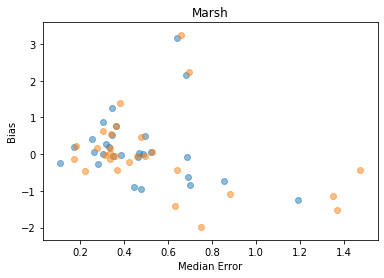

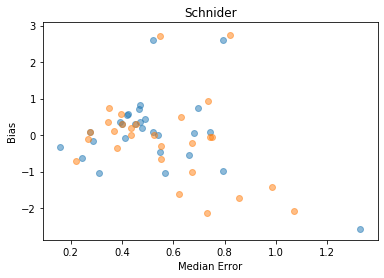

In [8]:
pyplot.figure()
pyplot.scatter(marsh_medians, marsh_bias, alpha=0.5)
pyplot.scatter(mod_marsh_medians, mod_marsh_bias, alpha=0.5)
pyplot.title('Marsh')
pyplot.xlabel('Median Error')
pyplot.ylabel('Bias')


# pyplot.axis([0, 2, -2, 2])

pyplot.figure()
pyplot.scatter(schnider_median, schnider_bias, alpha=0.5)
pyplot.scatter(mod_schnider_median, mod_schnider_bias, alpha=0.5)
pyplot.title('Schnider')
pyplot.xlabel('Median Error')
pyplot.ylabel('Bias')
# pyplot.axis([0, 2, -2, 2])

pyplot.show()

In [9]:
alphas = numpy.linspace(0.5, 2, num=16)
betas = numpy.linspace(0, 150, num=16)

row = (f"{b:4}"for b in betas)
print('{:4}'.format('XXX') + ' '.join(row))
for a in alphas:
#     print(*(f"{returnmedian(a, b):4}" for b in betas))
    row = (f"{returnmedian(a, b):4}" for b in betas)
    print(f"{a:4} " + ' '.join(row))
   
   

XXX  0.0 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0 110.0 120.0 130.0 140.0 150.0


/home/jmathilee/.local/share/virtualenvs/Propofol-O2oO_sjt/lib/python3.7/site-packages/PyTCI/models/base.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  self.x1 = self.x1 + drug_milligrams / self.v1
/home/jmathilee/.local/share/virtualenvs/Propofol-O2oO_sjt/lib/python3.7/site-packages/PyTCI/models/base.py:66: RuntimeWarning: invalid value encountered in double_scalars
  self.x1 = self.x1 + (x2k21 - x1k12 + x3k31 - x1k13 - x1k10)


 0.5 0.68 0.75 0.83 0.94 1.06 1.21 1.41 1.66 1.98 2.41  3.0 3.88 5.33 8.83 15.26  nan
 0.6 0.54 0.59 0.65 0.71 0.81 0.92 1.07 1.26 1.52 1.86 2.35 3.08 4.28 7.19 12.56  nan
 0.7 0.48  0.5 0.54 0.59 0.65 0.73 0.85  1.0  1.2 1.48 1.89  2.5 3.53 6.02 10.63  nan
 0.8 0.46 0.46 0.48 0.51 0.55 0.62  0.7 0.82 0.99 1.22 1.56 2.08 2.97 5.15 9.19  nan
 0.9 0.46 0.46 0.46 0.47 0.49 0.54 0.61 0.69 0.82 1.03 1.31 1.76 2.55 4.47 8.06  nan
 1.0 0.47 0.46 0.46 0.46 0.47 0.49 0.54 0.61 0.71 0.88 1.13 1.51 2.21 3.93 7.17  nan
 1.1 0.49 0.48 0.47 0.46 0.46 0.47 0.49 0.55 0.63 0.76 0.98 1.32 1.93  3.5 6.43  nan
1.2000000000000002 0.51  0.5 0.48 0.47 0.46 0.46 0.47 0.51 0.58 0.68 0.86 1.17 1.71 3.13 5.82  nan
 1.3 0.53 0.51  0.5 0.48 0.47 0.46 0.46 0.48 0.53 0.62 0.77 1.04 1.54 2.83  5.3  nan
 1.4 0.55 0.53 0.51  0.5 0.48 0.46 0.46 0.47  0.5 0.58 0.69 0.93 1.39 2.57 4.87  nan
 1.5 0.57 0.55 0.53 0.51  0.5 0.48 0.46 0.46 0.48 0.54 0.65 0.85 1.26 2.35  4.5  nan
 1.6 0.59 0.57 0.55 0.52 0.51 0.49 0.47 0.46 0.4